Steps to perform:
Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:

1.     Feature Transformation

●	Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors in the dataset.

3.     Additional Feature Engineering

●	You will check the correlation between features and drop those features that have a strong correlation.
●	This will help reduce the number of features and leave you with the most relevant features.

4.     Modeling

●	After applying EDA and feature engineering, you are now ready to build the predictive models.
●	In this part, you will create a deep learning model using Keras with Tensorflow backend.


In [1]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
print('imported')

imported


In [61]:
data=pd.read_csv('/content/loan_data.csv')
print('data loaded')

data loaded


In [3]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


purpose
all_other             2331
credit_card           1262
debt_consolidation    3957
educational            343
home_improvement       629
major_purchase         437
small_business         619
dtype: int64


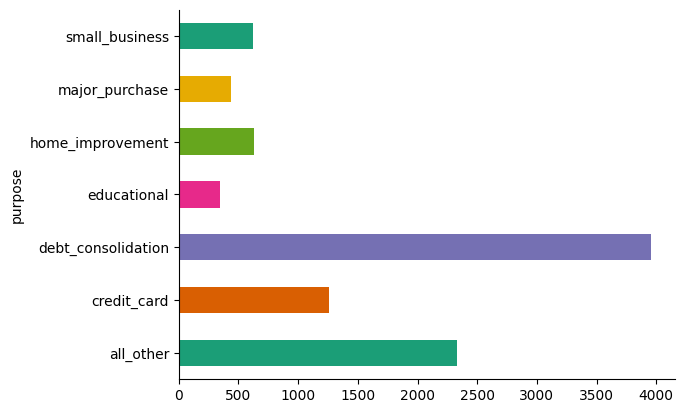

In [4]:
# @title purpose

from matplotlib import pyplot as plt
import seaborn as sns
dg = data.groupby('purpose').size()
print(dg)
dg.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

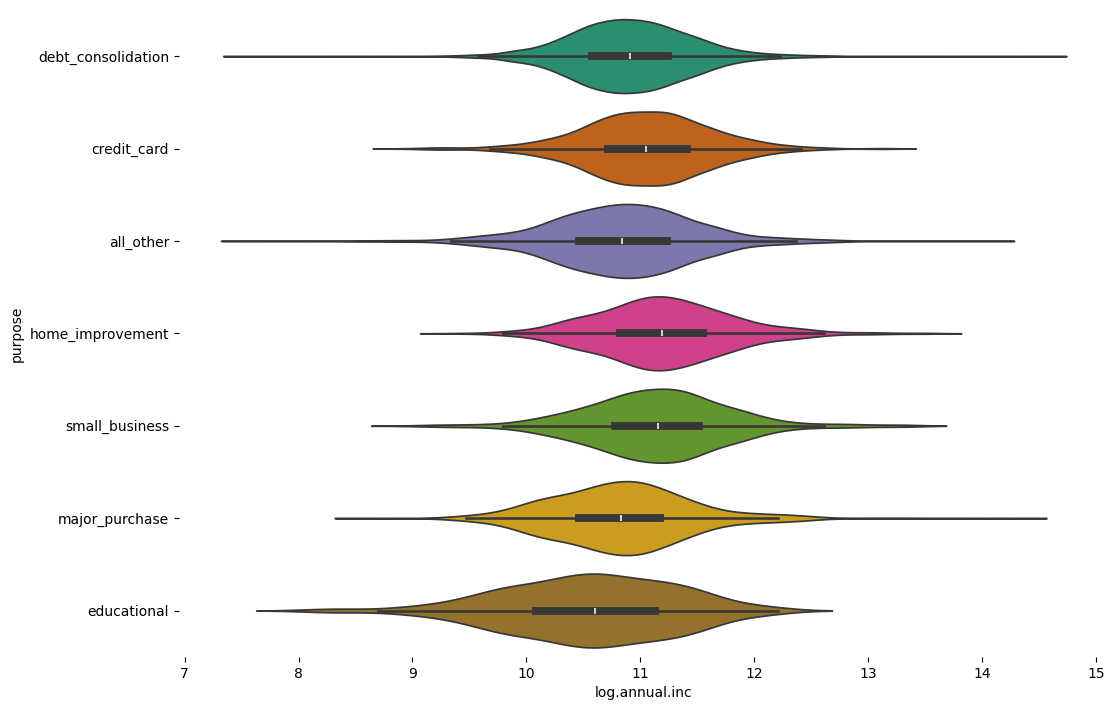

In [5]:
# @title purpose vs log.annual.inc

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['purpose'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='log.annual.inc', y='purpose', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
data.isnull().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


In [8]:
data['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,1533


<Axes: >

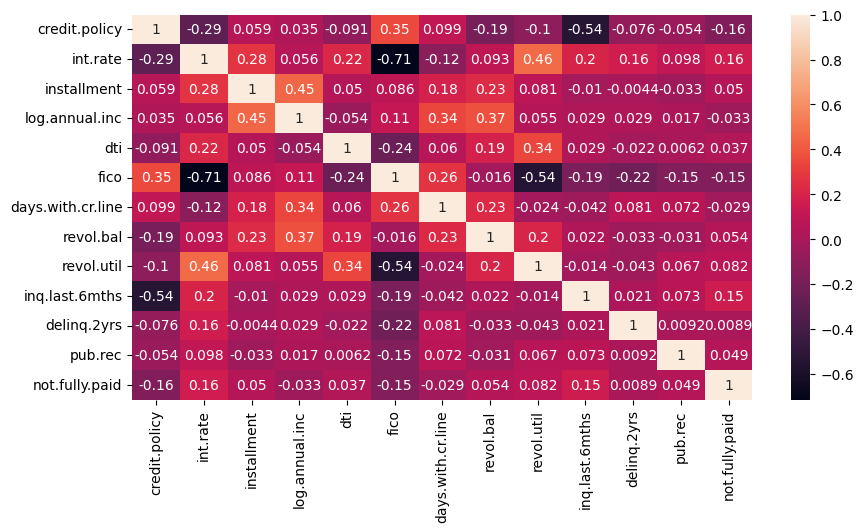

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [10]:
# handle imbalance data
no_fully_paid_0=data[data['not.fully.paid']==0]
no_fully_paid_1=data[data['not.fully.paid']==1]

In [11]:
print(no_fully_paid_0.shape)
print(no_fully_paid_1.shape)

(8045, 14)
(1533, 14)


In [12]:
# resample oversampling
from sklearn.utils import resample
no_fully_paid_1_upsampled=resample(no_fully_paid_1,replace=True,n_samples=len(no_fully_paid_0),random_state=42)
new_df=pd.concat([no_fully_paid_0,no_fully_paid_1_upsampled])
new_df['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,8045


In [13]:
# shuffle the data
from sklearn.utils import shuffle
new_df=shuffle(new_df)
new_df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9507,0,debt_consolidation,0.1322,253.51,10.703244,22.52,702,4530.041667,7202,34.5,4,0,0,1
5213,1,debt_consolidation,0.1114,164.02,10.463103,7.71,722,5399.958333,6896,41.8,0,0,0,0
178,1,educational,0.0775,156.11,10.858999,9.55,767,12960.041670,4067,7.3,0,0,0,0
8958,0,debt_consolidation,0.1379,170.38,10.126631,22.18,692,4320.041667,5040,45.2,5,0,1,0
7180,1,credit_card,0.1062,162.80,10.126631,7.06,702,2792.041667,3780,19.4,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,1,debt_consolidation,0.1218,832.50,10.736310,11.30,747,6930.000000,13873,15.5,4,0,0,0
6139,1,debt_consolidation,0.0774,199.80,10.463103,18.07,752,3210.000000,7994,24.7,0,0,0,0
3841,1,debt_consolidation,0.0932,127.79,10.621327,17.82,747,3990.000000,24764,32.0,0,0,0,1
8541,0,credit_card,0.1450,309.79,10.819778,27.84,692,3450.000000,39486,86.4,1,0,0,0


In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16090 entries, 9507 to 1383
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      16090 non-null  int64  
 1   purpose            16090 non-null  object 
 2   int.rate           16090 non-null  float64
 3   installment        16090 non-null  float64
 4   log.annual.inc     16090 non-null  float64
 5   dti                16090 non-null  float64
 6   fico               16090 non-null  int64  
 7   days.with.cr.line  16090 non-null  float64
 8   revol.bal          16090 non-null  int64  
 9   revol.util         16090 non-null  float64
 10  inq.last.6mths     16090 non-null  int64  
 11  delinq.2yrs        16090 non-null  int64  
 12  pub.rec            16090 non-null  int64  
 13  not.fully.paid     16090 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.8+ MB


In [15]:
# apply label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df['purpose']=le.fit_transform(new_df['purpose'])

# Feature Engineering

<Axes: >

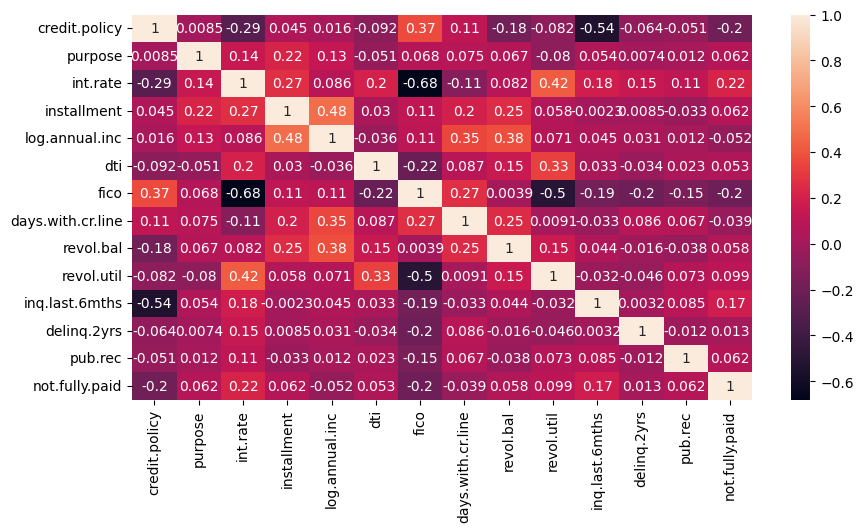

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(new_df.corr(numeric_only=True),annot=True)

In [17]:
corr_df= pd.DataFrame(new_df.corr().abs()['not.fully.paid'].sort_values(ascending=False)).reset_index()
corr_df.columns=['feature','corr']
corr_df

,feature,corr
0,not.fully.paid,1.000000
1,int.rate,0.217902
2,fico,0.204825
3,credit.policy,0.200215
4,inq.last.6mths,0.173274
5,revol.util,0.099233
6,installment,0.062145
7,pub.rec,0.061974
8,purpose,0.061968
9,revol.bal,0.058189


In [18]:
# we will choose the features which has a correlation of greater than 0.06
# corr_df[corr_df['corr']>0.06]
corr_df = corr_df[corr_df['corr']>0.06]
columns = corr_df['feature'].values
columns

array(['not.fully.paid', 'int.rate', 'fico', 'credit.policy',
       'inq.last.6mths', 'revol.util', 'installment', 'pub.rec',
       'purpose'], dtype=object)

In [19]:
new_df = new_df[columns]
X = new_df.drop('not.fully.paid',axis=1)
y = new_df['not.fully.paid']

In [20]:
X.shape


(16090, 8)

In [21]:
y.shape

(16090,)

In [22]:
# create splits
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
# Apply std scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
X_train

array([[ 0.65998136, -0.51002625,  0.58452706, ...,  1.04717469,
        -0.2638355 , -0.01066591],
       [-0.96420777,  0.17031883, -1.7107848 , ..., -0.39258793,
        -0.2638355 , -0.01066591],
       [-1.36464149,  1.12280194,  0.58452706, ...,  1.15170527,
        -0.2638355 ,  0.55665472],
       ...,
       [ 0.31194083, -1.19037133,  0.58452706, ..., -0.3355755 ,
        -0.2638355 , -0.57798654],
       [-0.63862147,  1.39493997,  0.58452706, ...,  0.76926833,
        -0.2638355 , -0.01066591],
       [ 0.4728628 ,  1.39493997,  0.58452706, ...,  0.15064371,
        -0.2638355 ,  2.25861662]])

# Create ANN using keras & tf

1. Create Architecture

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
# l2 regularizer
from tensorflow.keras.regularizers import l2
print('imported')

imported


In [26]:
X_train.shape[1]

8

In [28]:
from tensorflow import keras
model=Sequential()
# this will eliminate UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
inputs = keras.Input(shape=(X_train.shape[1],))
model.add(inputs)
# add first hidden layer
model.add(Dense(units=19,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# add scond hidden layer
model.add(Dense(units=15,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# third hidden layer
model.add(Dense(units=10,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
# output
model.add(Dense(1,activation='sigmoid'))
print('model created')

model created


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 19)                  │             171 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 19)                  │              76 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 15)                  │              60 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 818 (3.20 KB)

 Trainable params: 730 (2.85 KB)

 Non-trainable params: 88 (352.00 B)

In [30]:
# model compile
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print('model compiled')

model compiled


### gpu, over the epoch , accuracy must increase , losses must dec, monitor performance over the epochs, 10 epochs, model callbacks

In [31]:
# set up early stopping and model checkpoint call backs and train the model.
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,min_delta=0.01)
checkpoint=ModelCheckpoint('best_model.h5',monitor='val_loss',mode='min',verbose=1,save_best_only=True)
history=model.fit(X_train,y_train,
                  epochs=50,batch_size=128,
                  validation_data=(X_test,y_test),
                  callbacks=[early_stop,checkpoint])

Epoch 1/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5385 - loss: 0.7683
Epoch 1: val_loss improved from inf to 0.70848, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.5386 - loss: 0.7681 - val_accuracy: 0.5892 - val_loss: 0.7085
Epoch 2/50
 82/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5516 - loss: 0.7323
Epoch 2: val_loss improved from 0.70848 to 0.69467, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5532 - loss: 0.7310 - val_accuracy: 0.6025 - val_loss: 0.6947
Epoch 3/50
 98/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5713 - loss: 0.7140
Epoch 3: val_loss improved from 0.69467 to 0.68506, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5714 - loss: 0.7139 - val_accuracy: 0.6184 - val_loss: 0.6851
Epoch 4/50
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5920 - loss: 0.7031
Epoch 4: val_loss improved from 0.68506 to 0.67860, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5920 - loss: 0.7031 - val_accuracy: 0.6175 - val_loss: 0.6786
Epoch 5/50
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5832 - loss: 0.7009
Epoch 5: val_loss improved from 0.67860 to 0.67378, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5833 - loss: 0.7008 - val_accuracy: 0.6249 - val_loss: 0.6738
Epoch 6/50
 83/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5952 - loss: 0.6914
Epoch 6: val_loss improved from 0.67378 to 0.67162, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5949 - loss: 0.6913 - val_accuracy: 0.6243 - val_loss: 0.6716
Epoch 7/50
 98/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6000 - loss: 0.6905
Epoch 7: val_loss improved from 0.67162 to 0.67033, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6000 - loss: 0.6904 - val_accuracy: 0.6249 - val_loss: 0.6703
Epoch 8/50
 81/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6080 - loss: 0.6819
Epoch 8: val_loss improved from 0.67033 to 0.66701, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6075 - loss: 0.6825 - val_accuracy: 0.6265 - val_loss: 0.6670
Epoch 9/50
 95/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6070 - loss: 0.6797
Epoch 9: val_loss improved from 0.66701 to 0.66355, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6070 - loss: 0.6797 - val_accuracy: 0.6287 - val_loss: 0.6635
Epoch 10/50
 82/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6153 - loss: 0.6734
Epoch 10: val_loss improved from 0.66355 to 0.66243, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6142 - loss: 0.6742 - val_accuracy: 0.6336 - val_loss: 0.6624
Epoch 11/50
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6039 - loss: 0.6788
Epoch 11: val_loss improved from 0.66243 to 0.66114, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6040 - loss: 0.6788 - val_accuracy: 0.6333 - val_loss: 0.6611
Epoch 12/50
 84/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6096 - loss: 0.6732
Epoch 12: val_loss improved from 0.66114 to 0.65804, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6093 - loss: 0.6733 - val_accuracy: 0.6314 - val_loss: 0.6580
Epoch 13/50
 97/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6225 - loss: 0.6675
Epoch 13: val_loss improved from 0.65804 to 0.65629, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6220 - loss: 0.6677 - val_accuracy: 0.6327 - val_loss: 0.6563
Epoch 14/50
 99/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6019 - loss: 0.6758
Epoch 14: val_loss improved from 0.65629 to 0.65435, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6021 - loss: 0.6757 - val_accuracy: 0.6293 - val_loss: 0.6544
Epoch 15/50
 98/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6123 - loss: 0.6667
Epoch 15: val_loss improved from 0.65435 to 0.65429, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6123 - loss: 0.6667 - val_accuracy: 0.6346 - val_loss: 0.6543
Epoch 16/50
 99/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6140 - loss: 0.6703
Epoch 16: val_loss improved from 0.65429 to 0.65211, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6142 - loss: 0.6702 - val_accuracy: 0.6330 - val_loss: 0.6521
Epoch 17/50
 97/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6134 - loss: 0.6684
Epoch 17: val_loss improved from 0.65211 to 0.65055, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6134 - loss: 0.6683 - val_accuracy: 0.6336 - val_loss: 0.6506
Epoch 18/50
 92/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6221 - loss: 0.6616
Epoch 18: val_loss improved from 0.65055 to 0.65014, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6220 - loss: 0.6619 - val_accuracy: 0.6318 - val_loss: 0.6501
Epoch 19/50
 82/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6241 - loss: 0.6617
Epoch 19: val_loss improved from 0.65014 to 0.64885, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6234 - loss: 0.6617 - val_accuracy: 0.6327 - val_loss: 0.6488
Epoch 20/50
 83/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6126 - loss: 0.6636
Epoch 20: val_loss improved from 0.64885 to 0.64767, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6131 - loss: 0.6633 - val_accuracy: 0.6380 - val_loss: 0.6477
Epoch 21/50
 81/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6253 - loss: 0.6589
Epoch 21: val_loss improved from 0.64767 to 0.64673, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6250 - loss: 0.6588 - val_accuracy: 0.6342 - val_loss: 0.6467
Epoch 22/50
 83/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6197 - loss: 0.6577
Epoch 22: val_loss improved from 0.64673 to 0.64344, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6198 - loss: 0.6576 - val_accuracy: 0.6327 - val_loss: 0.6434
Epoch 23/50
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6080 - loss: 0.6637
Epoch 23: val_loss improved from 0.64344 to 0.64298, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6082 - loss: 0.6636 - val_accuracy: 0.6374 - val_loss: 0.6430
Epoch 24/50
 98/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6259 - loss: 0.6551
Epoch 24: val_loss improved from 0.64298 to 0.64079, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6257 - loss: 0.6550 - val_accuracy: 0.6361 - val_loss: 0.6408
Epoch 25/50
 81/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6242 - loss: 0.6522
Epoch 25: val_loss did not improve from 0.64079
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6237 - loss: 0.6530 - val_accuracy: 0.6321 - val_loss: 0.6427
Epoch 26/50
 97/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6278 - loss: 0.6519
Epoch 26: val_loss did not improve from 0.64079
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6276 - loss: 0.6520 - val_accuracy: 0.6439 - val_loss: 0.6421
Epoch 27/50
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6218 - loss: 0.6535
Epoch 27: val_loss did not improve from 0.64079
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6218 - loss: 0.6535 - val_accuracy: 0.6361 - val_loss: 0.6411
Epoch 28/50
 98/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6219 - loss: 0.6577
Epoch 28: val_loss improved from 0.64079

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6222 - loss: 0.6574 - val_accuracy: 0.6364 - val_loss: 0.6399
Epoch 29/50
 82/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6206 - loss: 0.6494
Epoch 29: val_loss improved from 0.63988 to 0.63877, saving model to best_model.h5


101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6220 - loss: 0.6493 - val_accuracy: 0.6318 - val_loss: 0.6388
Epoch 30/50
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6235 - loss: 0.6523
Epoch 30: val_loss did not improve from 0.63877
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6235 - loss: 0.6523 - val_accuracy: 0.6426 - val_loss: 0.6400
Epoch 31/50
 83/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6252 - loss: 0.6513
Epoch 31: val_loss did not improve from 0.63877
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6247 - loss: 0.6515 - val_accuracy: 0.6401 - val_loss: 0.6406
Epoch 32/50
 99/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6325 - loss: 0.6480
Epoch 32: val_loss did not improve from 0.63877
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6325 - loss: 0.6480 - val_accuracy: 0.6377 - val_loss: 0.6398
Epoch 32: early stopping


In [32]:
# print test score
score=model.evaluate(X_test,y_test)
print('test loss',score[0])
print('test accuracy',score[1])

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6239 - loss: 0.6457
test loss 0.6398138999938965
test accuracy 0.6376631259918213


In [33]:
# training accuracy
score=model.evaluate(X_train,y_train)
print('train loss',score[0])
print('train accuracy',score[1])

403/403 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6351 - loss: 0.6431
train loss 0.6416274309158325
train accuracy 0.6361094117164612


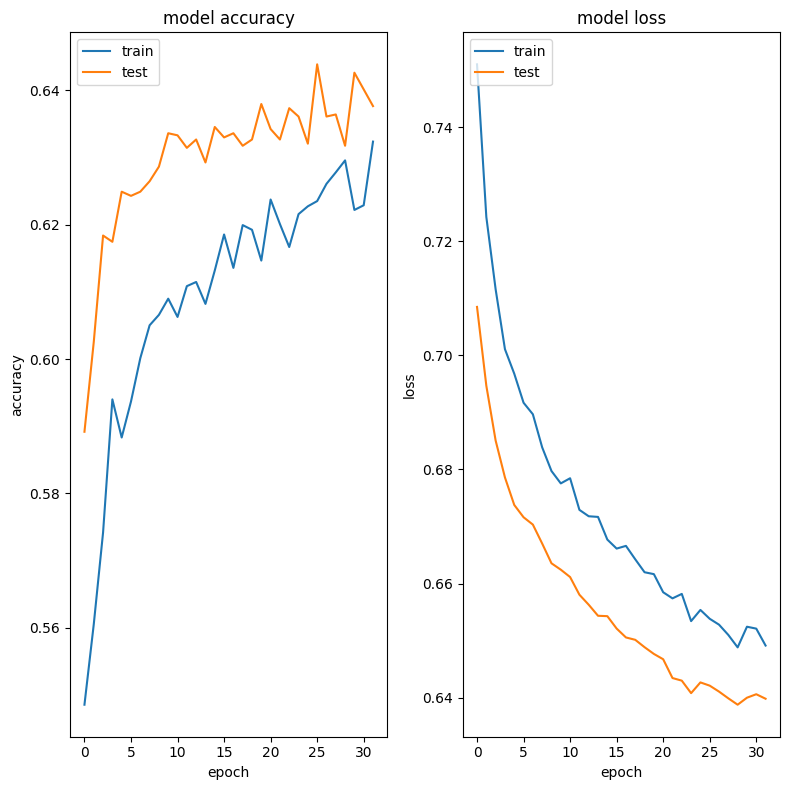

In [38]:
# plot accuracy
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.tight_layout()
plt.show()

# Apply random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
# pred & test
y_pred=rf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1503  120]
 [  29 1566]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1623
           1       0.93      0.98      0.95      1595

    accuracy                           0.95      3218
   macro avg       0.95      0.95      0.95      3218
weighted avg       0.96      0.95      0.95      3218

